# Objective Of This Code Along:
 
Make sure learners understand the image generation using Variational AutoEncoders.

# Jump to [Part 1](#Step1)

# Import Libraries

In [ ]:
import tensorflow as tf

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

#### Loading MNIST Digits Images

In [ ]:
# load mnist dataset
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# reshape train images into 28, 28, 1
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# reshape test images into 28, 28, 1
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

# normalizing the images to the range of [0., 1.]
train_images /= 255.
test_images /= 255.

# binarization
train_images[train_images >= .5] = 1.
train_images[train_images < .5] = 0.
test_images[test_images >= .5] = 1.
test_images[test_images < .5] = 0.

11501568/11490434 [==============================] - 0s 0us/step


<hr style="border:2px solid gray">
<a name= "Step1"></a>

# <font color='RED'> **MAKE SURE TO RUN ALL PREVIOUS CELLS**

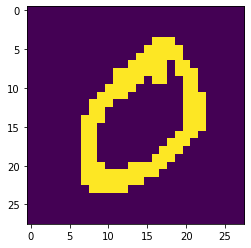

In [ ]:
plt.imshow(train_images[1,:,:,0]);

In [ ]:
TRAIN_BUF = 60000
BATCH_SIZE = 100

TEST_BUF = 10000

# use from_tensor_slices function to get dataset




#### Create Inference Net

In [ ]:
# create inference net




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               230500    
                                                                 
Total params: 249,316
Trainable params: 249,316
Non-trainable params: 0
_________________________________________________________________


#### Create Generative Net

In [ ]:
# create generative net




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1568)              79968     
                                                                 
 reshape (Reshape)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       18496     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289       
 ranspose)                                                       
                                                      

In [ ]:
# get all trainable variables



#### Divide encoding layer into vector of mean and variance

In [ ]:
def encode(inference_net, x):
  # divide encoding layer into mean and variance


  # return mean and variance


#### Reparameterization trick

For some distributions, it is possible to reparametrize samples in a clever way, such that the stochasticity is independent of the parameters. We want our samples to deterministically depend on the parameters of the distribution.

In [ ]:
def reparameterize(mean, logvar):
  # create random norise

  # return mean and variance with added random noise



Given the distribution parameters as input, predict the label of an image

In [ ]:
def decode(generative_net, z, apply_sigmoid=False):
  # get output from generative net

  # return the label for an image



#### Draw sample of an image from learnt distribution

In [ ]:
@tf.function
def sample(eps=None, apply_sigmoid=True):
  # return the output of generative net given input parameter values



#### Given generated sample and distribution parameters, compute log of gaussian 

In [ ]:
def log_normal_pdf(sample, mean, logvar, raxis=1):



#### Given an image and prediction, compute loss

In [ ]:
@tf.function
def compute_loss(encode, reparameterize, decode, x):
    # given input, get mean and variance using inference net

    # add noise to mean and variance

    # given mean, variance (noise added), get output prob using generative net

    # calculate cross entropy given actual label and prob output by generative net

    # calculate probability of image given distribution

    # calculate probability of distribution parameters

    # calculate probability of distribution given image
    


#### For explanations of the terms, refer: https://fangdahan.medium.com/derivation-of-elbo-in-vae-25ad7991fdf7

#### Adjust weights according to loss calculated














In [ ]:
def compute_apply_gradients(encode, reparameterize, decode, x, optimizer, trainable_variables):



#### Generate test samples

In [ ]:
# keeping the random vector constant for generation (prediction) so 
# it will be easier to see the improvement.



In [ ]:
def generate_and_save_images(sample, epoch, test_input):



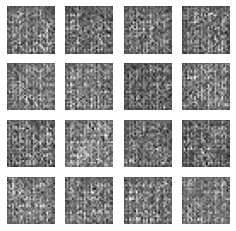

In [ ]:
epochs = 10

Epoch: 10, Test set ELBO: -93.87474822998047, time elapse for current epoch 5.243277072906494


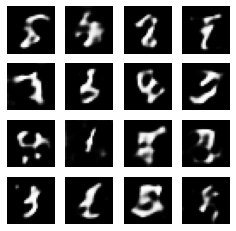

In [ ]:
for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
        compute_apply_gradients(encode, reparameterize, decode, train_x, optimizer, trainable_variables)
    end_time = time.time()
    if epoch % 1 == 0:
        loss = tf.keras.metrics.Mean()
        for test_x in test_dataset:
            loss(compute_loss(encode, reparameterize, decode, test_x))
        elbo = -loss.result()
        
        display.clear_output(wait=False)
        print('Epoch: {}, Test set ELBO: {}, '
              'time elapse for current epoch {}'.format(epoch,
                                                        elbo,
                                                        end_time - start_time))
        
        generate_and_save_images(sample, epoch, random_vector_for_generation)  

# <font color='orange'>**STOP HERE**